<a href="https://colab.research.google.com/github/jiayuanteng/Hands_on_ML2/blob/main/2_End_to_End_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Prices dataset


In [ ]:
import os
import tarfile
import urllib
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Load data

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [ ]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


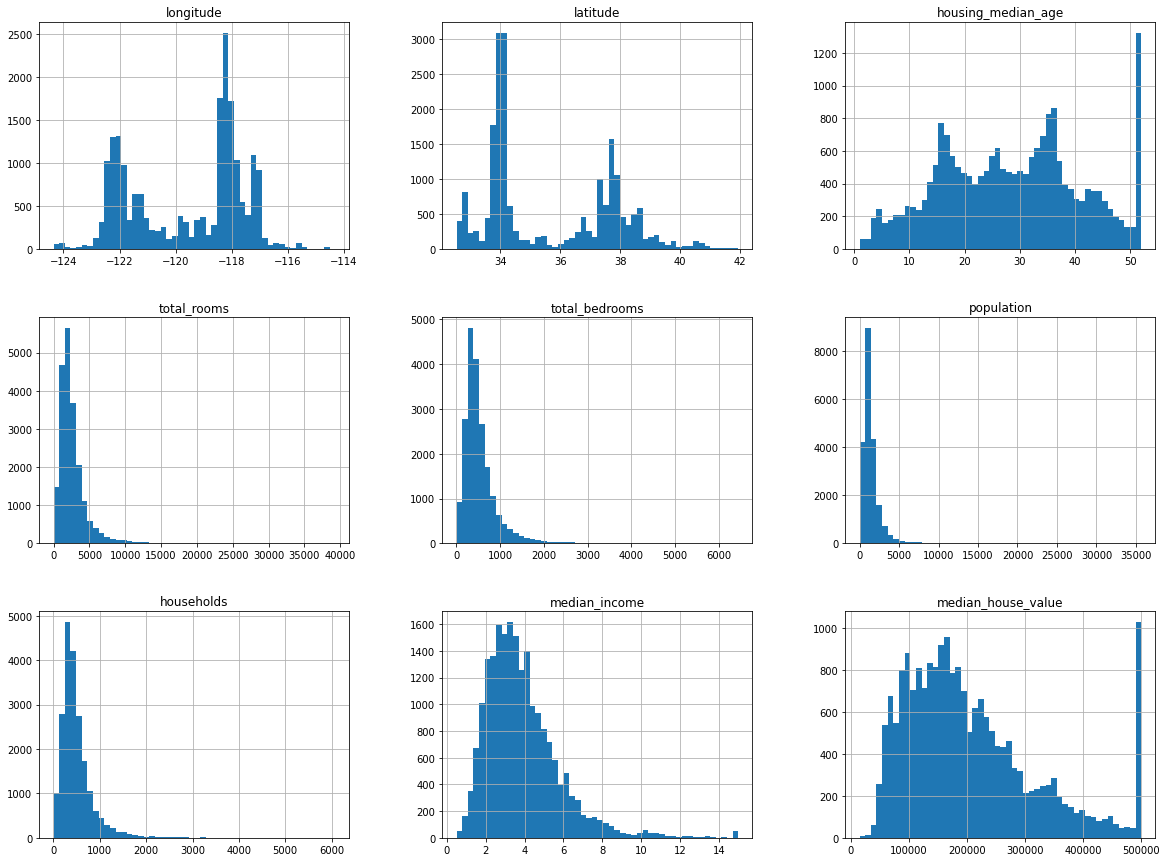

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Split test and train
Do not want to use random sampling when spliting train and test, or I would "see" all the data eventually.

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set_random, test_set_random = split_train_test(housing, 0.2)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
# create income categories
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0, 1.5, 3, 4.5, 6, np.inf], 
                              labels = [1, 2, 3, 4, 5])

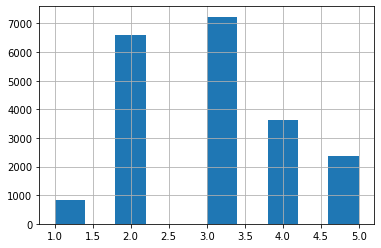

In [ ]:
housing['income_cat'].hist()

In [ ]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [ ]:
# stratified sampling
split = sk.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  print(train_index, test_index)
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
sampling = [test_['income_cat'].value_counts()/len(test_)
           for test_ in [housing, test_set, strat_test_set]]
  
sampling = pd.concat(sampling, axis = 1)
sampling.columns = ['Overall', "Random", "Stratified"]
sampling['Rand. %error'] = sampling['Random']/sampling['Overall'] - 1
sampling['Stratified. %error'] = sampling['Stratified']/sampling['Overall'] - 1


In [ ]:
sampling

,Overall,Random,Stratified,Rand. %error,Stratified. %error
3,0.350581,0.358527,0.350533,0.022664,-0.000138
2,0.318847,0.324370,0.318798,0.017323,-0.000152
4,0.176308,0.167393,0.176357,-0.050563,0.000275
5,0.114438,0.109496,0.114341,-0.043184,-0.000847
1,0.039826,0.040213,0.039971,0.009732,0.003650


In [ ]:
for set_ in [strat_test_set, strat_train_set]:
  set_.drop(['income_cat'], axis = 1, inplace = True)

In [ ]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


# Data exploration
put test set aside. sample an exploration set if training set is large to make exploration easy

In [ ]:
housing = strat_train_set.copy()

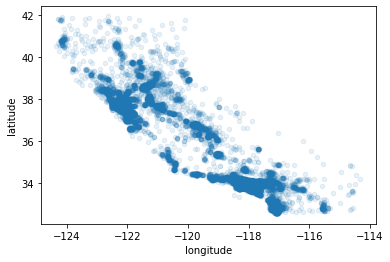

In [ ]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


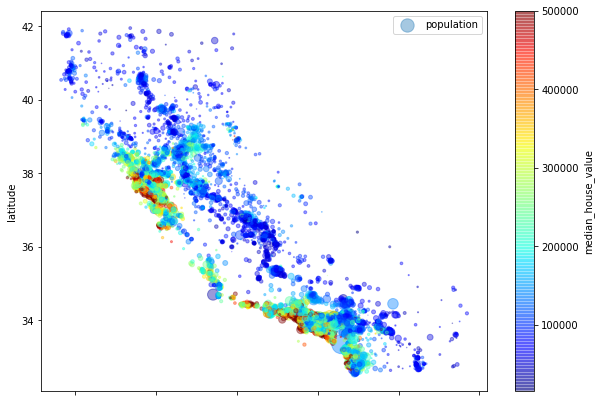

In [ ]:
housing.plot(kind = "scatter", x = "longitude", y = 'latitude', 
             alpha = 0.4, s = housing['population']/100,
             label = 'population', figsize = (10, 7), 
             c = "median_house_value", cmap = plt.get_cmap("jet"), 
             colorbar = True)
plt.legend()

In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a04fbcf50>,
      dtype=object)

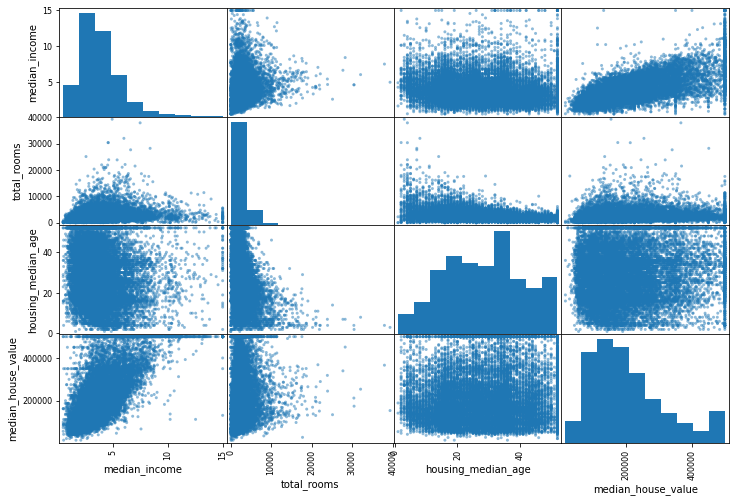

In [ ]:
attributes = ['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']
pd.plotting.scatter_matrix(housing[attributes], figsize = [12, 8])

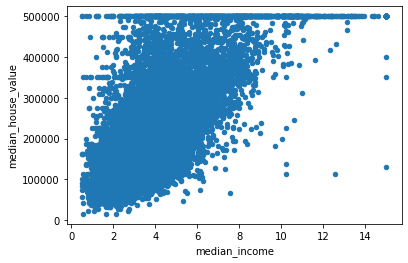

In [ ]:
housing.plot(kind = 'scatter', y = 'median_house_value', x = 'median_income')

In [ ]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']



In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a051c6b10>,
      dtype=object)

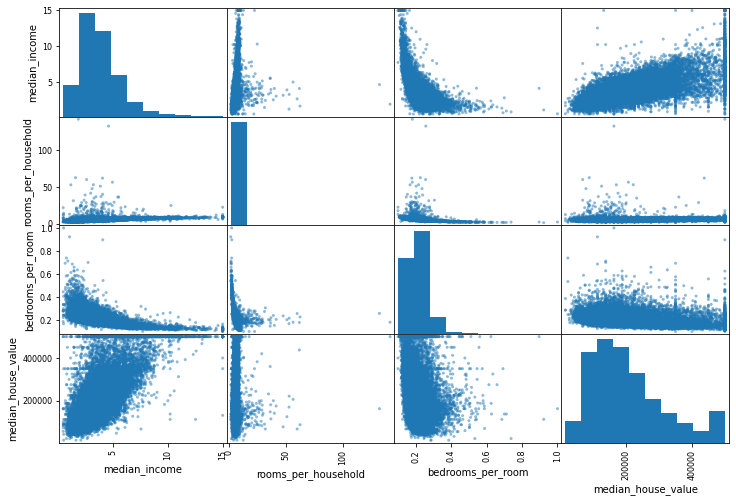

In [ ]:
attributes = ['median_income', 'rooms_per_household', 
              'bedrooms_per_room', 'median_house_value']
pd.plotting.scatter_matrix(housing[attributes], figsize = [12, 8])

# Data transformation

In [ ]:
housing = strat_train_set.drop(['median_house_value'], axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
for col in list(housing.columns):
  print("{} has {:} of missing values".format(col, len(housing[housing[col].isnull()])))

longitude has 0 of missing values
latitude has 0 of missing values
housing_median_age has 0 of missing values
total_rooms has 0 of missing values
total_bedrooms has 158 of missing values
population has 0 of missing values
households has 0 of missing values
median_income has 0 of missing values
ocean_proximity has 0 of missing values


In [ ]:
# replace null with median
# use training set. 
# store median and use this value to fill null of total bedrooms in test set
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [ ]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [ ]:
housing

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [ ]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
housing.values[:, 2].shape

(16512,)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAsser(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y = None):
    return self
  
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
    population_per_household = X[:, population_ix]/X[:, households_ix]

    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    
    else:
      return np.c_[X, rooms_per_household, population_per_household]
  



In [ ]:
attr_adder = CombinedAttributesAsser(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs.shape

(16512, 11)

## Feature scaling

In [ ]:
# pipeline for numerical attributes
# replace null with median values
# add new features
# standardize features to mean of 0 and std of 1

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy = 'median')),
                         ('attribs_adder', CombinedAttributesAsser()),
                         ('std_scaler', StandardScaler())

])
# housing_num does not have ocean proximity
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
[housing_num[:,ix].mean() for ix in range(housing_num.shape[1])]

[-5.249246343368206e-15,
 2.81159677796303e-16,
 8.778507636571005e-17,
 -1.5491484064537068e-17,
 -1.3587322481604386e-16,
 6.454785026890445e-19,
 -1.054281554392106e-17,
 1.1484138360342583e-16,
 -6.949651878952046e-17,
 -2.7607653458762674e-17,
 5.732924901383197e-16]

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

# Select and train a model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [ ]:
housing_labels.describe()

count     16512.000000
mean     207005.322372
std      115701.297250
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

## Better evaluation with cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)


In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [74204.91882134 69666.09937824 68373.39117051 73158.48063018
 68540.52469199 77759.9604885  71459.44710406 71877.55564239
 69210.51609853 71786.35342723]
Mean: 71603.7247452956
Standard deviation: 2766.0794801163693


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180607


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                             scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51541.87655679 48575.89547089 46872.93935949 52381.1278684
 47817.002637   52065.95556737 52426.62362829 50004.30907836
 48335.63189352 53955.18529499]
Mean: 50397.65473551053
Standard deviation: 2271.744372083103


## Fine-Tune models

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, 
                           scoring = "neg_mean_squared_error", 
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

63998.06426718512 {'max_features': 2, 'n_estimators': 3}
55766.12728257246 {'max_features': 2, 'n_estimators': 10}
52853.55395393049 {'max_features': 2, 'n_estimators': 30}
60381.333382424455 {'max_features': 4, 'n_estimators': 3}
52888.47334823739 {'max_features': 4, 'n_estimators': 10}
50352.852550704345 {'max_features': 4, 'n_estimators': 30}
58642.6969337607 {'max_features': 6, 'n_estimators': 3}
52359.48144530613 {'max_features': 6, 'n_estimators': 10}
50097.97180743778 {'max_features': 6, 'n_estimators': 30}
58699.42159792277 {'max_features': 8, 'n_estimators': 3}
52115.651647893654 {'max_features': 8, 'n_estimators': 10}
50207.12559254559 {'max_features': 8, 'n_estimators': 30}
61723.63006875499 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54127.74938849532 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60198.36865096893 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52626.96371479728 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse = True)

[(0.31274344835099094, 'median_income'),
 (0.1598155742574058, 'INLAND'),
 (0.10768963527044975, 'pop_per_hhold'),
 (0.08400998308077748, 'bedrooms_per_room'),
 (0.07124679021085124, 'longitude'),
 (0.06971945847899888, 'latitude'),
 (0.062400673852849066, 'rooms_per_hhold'),
 (0.04406693561616305, 'housing_median_age'),
 (0.018484690058797593, 'total_rooms'),
 (0.018182090201670963, 'population'),
 (0.016945337445864645, 'total_bedrooms'),
 (0.01657902966795129, 'households'),
 (0.009540913652685763, '<1H OCEAN'),
 (0.0043845261458634035, 'NEAR BAY'),
 (0.004111622941382927, 'NEAR OCEAN'),
 (7.929076729722021e-05, 'ISLAND')]

In [ ]:
# store model
import joblib
joblib.dump(grid_search.best_estimator_, "random_forest_tree.pkl")


['random_forest_tree.pkl']

# Evaluate the system on the test set

In [ ]:
# final_model = grid_search.best_estimator_

final_model = joblib.load("random_forest_tree.pkl")

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_prediction)

final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

47837.55634150916

In [ ]:
from scipy import stats
confidence = 0.95

squared_errors = (final_prediction - y_test)**2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc = squared_errors.mean(),
        scale = stats.sem(squared_errors)))


array([45847.58185558, 49747.99324043])